# Build network using user-defined resources

This notebook explores how to add other individual resources from Omnipath or other public databases.

In [2]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko.inputs import Universe, signor
import omnipath as op
import pandas as pd

CPU times: user 48 µs, sys: 7 µs, total: 55 µs
Wall time: 62.5 µs


## 1. Adding a resource already in OmniPath

### 1A. Specify the interaction resource of interest

In [11]:
collectri = op.interactions.CollecTRI.get()

### 1B. Add new resource to the Resources object

In [12]:
resources = Universe()
resources.add_resources(collectri, name = 'collectri')
resources.build()

The generated WARNING suggest that some interactions could be missing (like in this case, the Ligand-Receptor database from Omnipath does not contain any column "form_complex"); while this is limiting the amount of knowledge NeKo can extract, it does not prevent the package from working. Other possible cause of a WARNING is the absence of "consensus" columns. To avoid error in this case, set always consensus to False.

## 2. Adding a public database

Alternatively, the user might want to use their own interaction databases. We have already implemented the inclusion of some of widely used databases. 

As example, we show here how to integrate the [Signor 3.0](https://signor.uniroma2.it/) database. In order to do so, the User needs to have already downloaded the whole Signor database, available at the following link: [https://signor.uniroma2.it/downloads.php](https://signor.uniroma2.it/downloads.php) or with the following code:. 

### 2A. Add Signor database



In [33]:
resources = signor("../neko/_data/signor_db.tsv")  # this function accept only tab separated values

In [34]:
resources.interactions

,source,target,is_directed,is_stimulation,is_inhibition,form_complex,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources,is_activation
0,A0A024RAD5,SIGNOR-C535,True,False,False,True,False,False,False,miannu,31831667,SIGNOR-272062,True
1,A0A0B4J2F0,P18848,False,False,True,False,False,False,False,miannu,31653868,SIGNOR-261041,False
2,A0A0B4J2F0,P35638,False,False,True,False,False,False,False,miannu,31653868,SIGNOR-261043,False
3,A0A0B4J2F0,SIGNOR-PH2,False,False,True,False,False,False,False,miannu,31653868,SIGNOR-261042,False
4,A0AVT1,SIGNOR-C496,True,False,False,True,False,False,False,miannu,24816100,SIGNOR-270835,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29575,URS000075C808_9606,Q6ZN04,True,True,False,False,False,False,False,miannu,24326307,SIGNOR-272092,True
29576,URS000075C808_9606,Q86Y13,True,True,False,False,False,False,False,miannu,24326307,SIGNOR-272091,True
29577,URS000075CF56_9606,P05019,True,False,True,False,False,False,False,miannu,25477897,SIGNOR-255793,False
29578,URS000075CF56_9606,P23759,True,False,True,False,False,False,False,irozzo,24708856,SIGNOR-256124,False


In order to avoid conflict or errors, ensure that the file contains at least the following columns: IDA, IDB, EFFECT, ANNOTATOR, PMID, SIGNOR_ID

### 
<div class="alert alert-info">

**Note**
    
SIGNOR uses has different identifiers for complexes, protein family, phenotype, etc.
It is possible that the network contains nodes names like "Signor_pf32" or something like this... This is not yet translated, but if you are interested in what those nodes consist of, you can use download their vocabulary for the entities: [https://signor.uniroma2.it/downloads.php](https://signor.uniroma2.it/downloads.php)

</div>  



## 3. Build the network

### 3A. Import genes as network nodes

In [35]:
genes = ["SRC", "NOTCH1", "PTK2", "CDH1", "CDH2", "VIM", "MAP4K4", "LATS1", "LATS2"]

### 3B. Create network object by specifying the interaction resources

In [36]:
new_net1 = Network(genes, resources = resources.interactions)

In [37]:
#Print node dataframe
new_net1.nodes

,Genesymbol,Uniprot,Type
0,SRC,P12931,NaN
1,NOTCH1,P46531,NaN
2,PTK2,Q05397,NaN
3,CDH1,P12830,NaN
4,CDH2,P19022,NaN
5,VIM,P08670,NaN
6,MAP4K4,O95819,NaN
7,LATS1,O95835,NaN
8,LATS2,Q9NRM7,NaN


### 3C. Build network

The downstream steps to connect your nodes, are the same. Please see the [Network building](https://omniflow-project.readthedocs.io/en/latest/notebooks/network_building.html) tutorial for detailed explanations of each step.

In [38]:
%%time
new_net1.connect_nodes(only_signed=True, consensus_only=False)

CPU times: user 74.4 ms, sys: 3.93 ms, total: 78.4 ms
Wall time: 76.9 ms


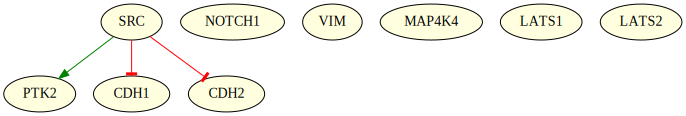

In [39]:
visualizer = NetworkVisualizer(new_net1, color_by='effect', noi=True)
visualizer.render()

<div class="alert alert-info">

**Note**
    
NB! It is important to note, that not all the databases have the same structure as Omnipath. In particular, if the columns "consensus" are missing, we suggest to avoid to use the flag `consensus` or `consensus_only` when using NeKo with customize databases. As a general advise, we suggest to always use `consensus=False` when you are using a database different from the Omnipath. 

</div>  

In [40]:
%%time
new_net1.complete_connection(maxlen=3, algorithm="bfs", only_signed=True, connect_with_bias=False, consensus=False) 

CPU times: user 7.03 s, sys: 352 ms, total: 7.38 s
Wall time: 7.45 s


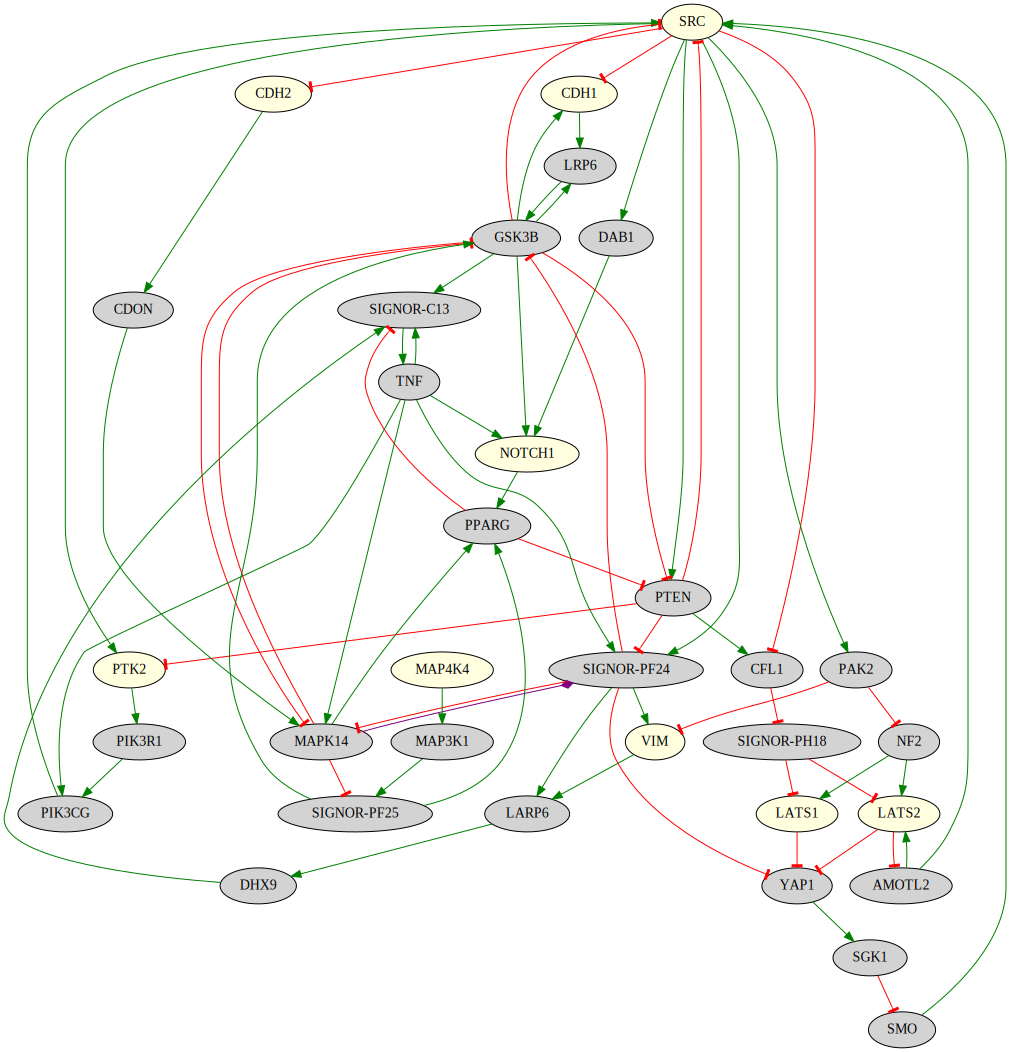

In [41]:
#Visualize network
visualizer1 = NetworkVisualizer(new_net1, color_by='effect', noi=True)
visualizer1.render()

## 4. Translate IDs 

NeKo's resource object relies on UniProt IDs. In cases where the user-defined database does not have UniProt IDs, NeKo offers the function to translate between different IDs. The translation module is based on the python package "Unipressed" (https://github.com/multimeric/Unipressed).

In the example below, we use the HURI database (http://www.interactome-atlas.org/) which provides protein-protein interactions (ppi) with ENSEMBL IDs.

To run the following example, please download the database at the following link: http://www.interactome-atlas.org/download. The example uses the `HI-Union` version of the database in `.tsv` format.

In [42]:
#Import the module
from neko.inputs.db_translator import IDTranslator

The `IDTranslator` function receives as arguments the input and output file names, together with the existing IDs and the target ones (in that case Ensembl to UniProtKB IDs).

<div class="alert alert-info">

**Note**
    
NB! The `IDTranslator` can take several minutes the first time you translate a database, depending on the size of the database.
</div>  

In [43]:
translator = IDTranslator('HI-union.tsv', 'genes_translated.csv', 'Ensembl', 'UniProtKB-Swiss-Prot', has_header=False, input_columns=['source', 'target'], processes=12)

In [44]:
%%time
translator.run()

INFO:IDTranslator_140412855874560:Starting ID translation process from Ensembl to UniProtKB-Swiss-Prot


INFO:IDTranslator_140412855874560:Loaded 64006 rows with 9094 unique IDs


INFO:IDTranslator_140412855874560:Loaded progress from checkpoint_batch_91.pkl


Processing batches: 0it [00:00, ?it/s]

INFO:IDTranslator_140412855874560:Applying translation to dataframe...


INFO:IDTranslator_140412855874560:Results saved to genes_translated.csv


INFO:IDTranslator_140412855874560:ID translation process completed in 109.93 seconds


INFO:IDTranslator_140412855874560:Original entry count: 64065


INFO:IDTranslator_140412855874560:Translated entry count: 64065


INFO:IDTranslator_140412855874560:Expansion factor: 1.00


INFO:IDTranslator_140412855874560:Translation success rate: 100.00%


CPU times: user 1min 49s, sys: 727 ms, total: 1min 49s
Wall time: 1min 49s


In [45]:
translator.remove_untranslated_entries()

INFO:IDTranslator_140412855874560:Results saved to genes_translated_cleaned.csv


INFO:IDTranslator_140412855874560:Removed 0 untranslated entries.


INFO:IDTranslator_140412855874560:Cleaned database saved to genes_translated_cleaned.csv


INFO:IDTranslator_140412855874560:Original entry count: 64065


INFO:IDTranslator_140412855874560:Cleaned entry count: 64065


INFO:IDTranslator_140412855874560:Original entry count: 64065


INFO:IDTranslator_140412855874560:Translated entry count: 64065


INFO:IDTranslator_140412855874560:Expansion factor: 1.00


INFO:IDTranslator_140412855874560:Translation success rate: 100.00%


In [46]:
resources = Resources()

In [47]:
huri = pd.read_csv("genes_translated_cleaned.csv", usecols=["source_UniProtKB-Swiss-Prot", "target_UniProtKB-Swiss-Prot"])

In [48]:
huri.head()

,source_UniProtKB-Swiss-Prot,target_UniProtKB-Swiss-Prot
0,Q9H2S6,Q9NPE6
1,Q9H2S6,Q9BXK5
2,Q9H2S6,O60238
3,Q9H2S6,P20138
4,Q9H2S6,Q9UM44


In [49]:
mapping = {"source_UniProtKB-Swiss-Prot": "source", "target_UniProtKB-Swiss-Prot": "target"}
resources.add_database(huri, column_mapping=mapping,  reset_index=True)

In [50]:
genes = ["CD33", "TNMD", "AMIGO1"]

In [51]:
new_net1 = Network(genes, resources=resources.interactions)

In [52]:
new_net1.connect_network_radially(max_len=1, only_signed=False, consensus=False)

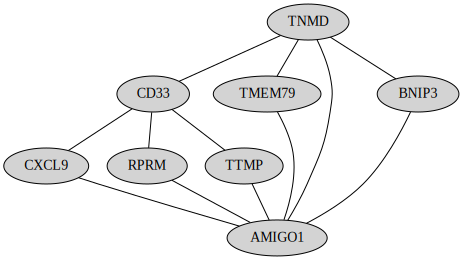

In [53]:
visualizer = NetworkVisualizer(new_net1, color_by='effect')
visualizer.render()